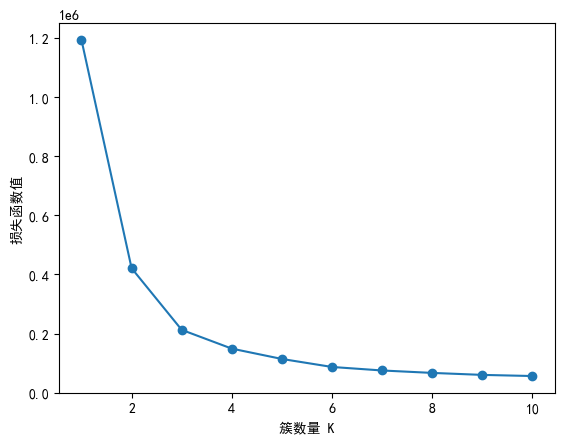

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 读取数据
data = pd.read_excel('预处理最终版本SC.xlsx')

# 只选择需要使用的特征列
features = data[['出生年', '性别',  '血糖','胆固醇','甘油三酯']]

from sklearn.impute import SimpleImputer

# 创建一个填充器，使用均值进行填充
# imputer = SimpleImputer(strategy='mean')

# 对特征进行缺失值填充
# filled_features = imputer.fit_transform(features)

# 计算不同 K 值对应的损失函数值
inertia = []
# 创建 KMeans 聚类模型，选择簇数量 K 的范围
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(filled_features)
    inertia.append(kmeans.inertia_)

# 绘制手肘法图形
plt.plot(k_range, inertia, marker='o')
plt.xlabel('簇数量 K')
plt.ylabel('损失函数值')
plt.show()

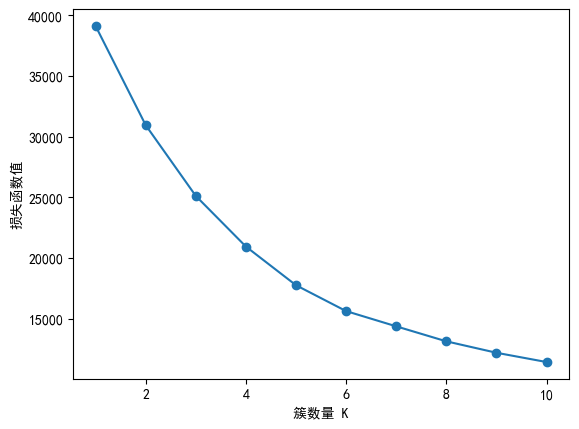

分类0的数据：
           出生年        性别      文化程度      婚姻状况        职业      是否吸烟   开始吸烟年龄  \
0     1.093632  0.889301  0.233152 -1.813403  0.377179  0.542274 -0.37768   
1     1.999005  0.889301 -0.731849 -1.813403  1.438576  0.542274 -0.37768   
5     0.846713  0.889301 -0.731849  0.059276  0.642528  0.542274 -0.37768   
6     0.846713  0.889301  1.198153  0.059276  0.111829  0.542274 -0.37768   
7     1.669779  0.889301  0.233152 -1.813403  1.438576  0.542274 -0.37768   
...        ...       ...       ...       ...       ...       ...      ...   
7826  0.764406  0.889301  0.233152  0.059276 -1.745616  0.542274 -0.37768   
7827  0.929019  0.889301 -0.731849  0.059276 -1.745616  0.542274 -0.37768   
7828  0.188260  0.889301 -1.696849  0.059276  0.377179  0.542274 -0.37768   
7830  0.352873  0.889301  0.233152  0.059276  0.642528  0.542274 -0.37768   
7833 -0.387886  0.889301 -0.731849  0.059276  0.642528  0.542274 -0.37768   

      平均每周吸烟天数    一天吸烟支数    是否被动吸烟  ...  食用新鲜蔬菜的频率   食用海草的频率   食用咸菜

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 读取数据
data = pd.read_excel('预处理最终版本SC.xlsx')

# 只选择需要使用的特征列
features = data[['出生年', '性别', '血糖', '胆固醇', '甘油三酯']]

from sklearn.impute import SimpleImputer

# 创建一个填充器，使用均值进行填充
imputer = SimpleImputer(strategy='mean')

# 对特征进行缺失值填充
filled_features = imputer.fit_transform(features)

# 计算不同 K 值对应的损失函数值
inertia = []
# 创建 KMeans 聚类模型，选择簇数量 K 的范围
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(filled_features)
    inertia.append(kmeans.inertia_)

# 绘制手肘法图形
plt.plot(k_range, inertia, marker='o')
plt.xlabel('簇数量 K')
plt.ylabel('损失函数值')
plt.show()

# 根据最佳簇数量K进行分类
best_k = 6  # 假设最佳簇数量为3

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(filled_features)
labels = kmeans.labels_

# 将类别标签合并到原始数据中
data_with_labels = pd.concat([data, pd.DataFrame({'Label': labels})], axis=1)

# 按照类别标签进行分类
for label in range(best_k):
    classified_data = data_with_labels[data_with_labels['Label'] == label]
    # 进行相应的操作，比如打印分类结果或保存到文件等
    print(f'分类{label}的数据：')
    print(classified_data)